<h1><center>IST 597 Foundations of Deep Learning</center></h1>

---

<h2><center>Neural Networks</center><h2>
<h3><center>Neisarg Dave</center><h3>

https://playground.tensorflow.org/

In [1]:
import torch
import random
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from IPython.display import clear_output
import numpy as np
%matplotlib inline

device = torch.device("cuda:0")

seed = 1234 
random.seed(seed)
torch.manual_seed(seed)

In [2]:
train_dataset = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_dataset = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

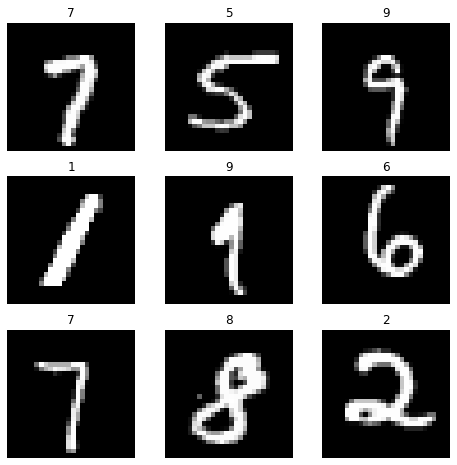

In [3]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [4]:
class NeuralNetwork(torch.nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.output = torch.nn.Linear(784, 10)
  
  def forward(self, x):
    out = self.output(x)
    return out

In [5]:
def visualize_weight(weight):
  clear_output(wait=True)
  figure = plt.figure(figsize=(16, 8))
  cols, rows = 5, 2
  for ii in range(weight.shape[0]):
    img = weight[ii].reshape(28, 28)
    figure.add_subplot(rows, cols, ii+1)
    plt.title(ii)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
  plt.show()



In [6]:
model = NeuralNetwork().cuda()


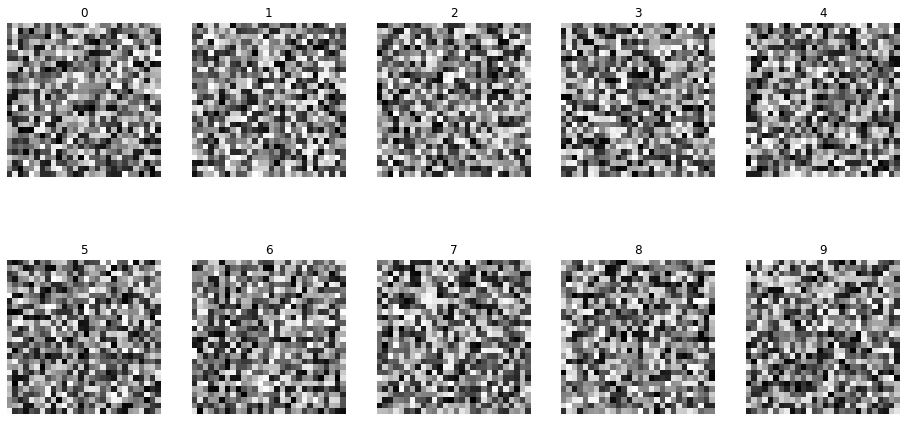

In [7]:
visualize_weight(model.output.weight.detach().cpu())

In [8]:
import matplotlib.gridspec as gridspec
def live_plots(weight, grad, x, y, xlim, ylim):
    clear_output(wait=True)
    fig = plt.figure(figsize=(32, 16))
    gs0 = gridspec.GridSpec(2, 2, figure=fig)
    gs02 = gridspec.GridSpecFromSubplotSpec(2, 5, subplot_spec=gs0[1])
    
    #plt.figure(figsize=figsize) 
    ax1 = fig.add_subplot(gs0[0])
    # ax3 = fig.add_subplot(gs00[-1, -1])
    ax1.set_xlim(0, xlim)
    ax1.set_ylim(0, ylim)
    x = [float(i) for i in x]
    y = [float(i) for i in y]
    
    if len(x) > 1:
        ax1.scatter(x,y, label='axis y', color='k') 
        m, b = np.polyfit(x, y, 1)
        plt.plot(x, [x * m for x in x] + b)

    ax1.set_title("Loss Curve")
    ax1.grid(True)
    ax1.set_xlabel('# Iterations')
    ax1.set_ylabel('Loss')
    #plt.show();

    #figure = plt.figure(figsize=(16, 8))
    cols, rows = 5, 2
    for ii in range(weight.shape[0]):
      img = weight[ii].reshape(28, 28)
      ax = fig.add_subplot(gs02[ii//5, ii%5])
      #figure.add_subplot(rows, cols, ii+1)
      ax.set_title(ii)
      ax.axis("off")
      ax.imshow(img.squeeze(), cmap="gray")

    ax2 = fig.add_subplot(gs0[2])
    ax2.hist(weight, 50, density=True, facecolor='g', alpha=0.75)
    ax2.set_title("Distribution of Weight Matrix")

    ax3 = fig.add_subplot(gs0[3])
    ax3.hist(grad, 50, density=True, facecolor='b', alpha=0.75)
    ax3.set_title("Distribution of Gradients of Weight Matrix")

    plt.show()

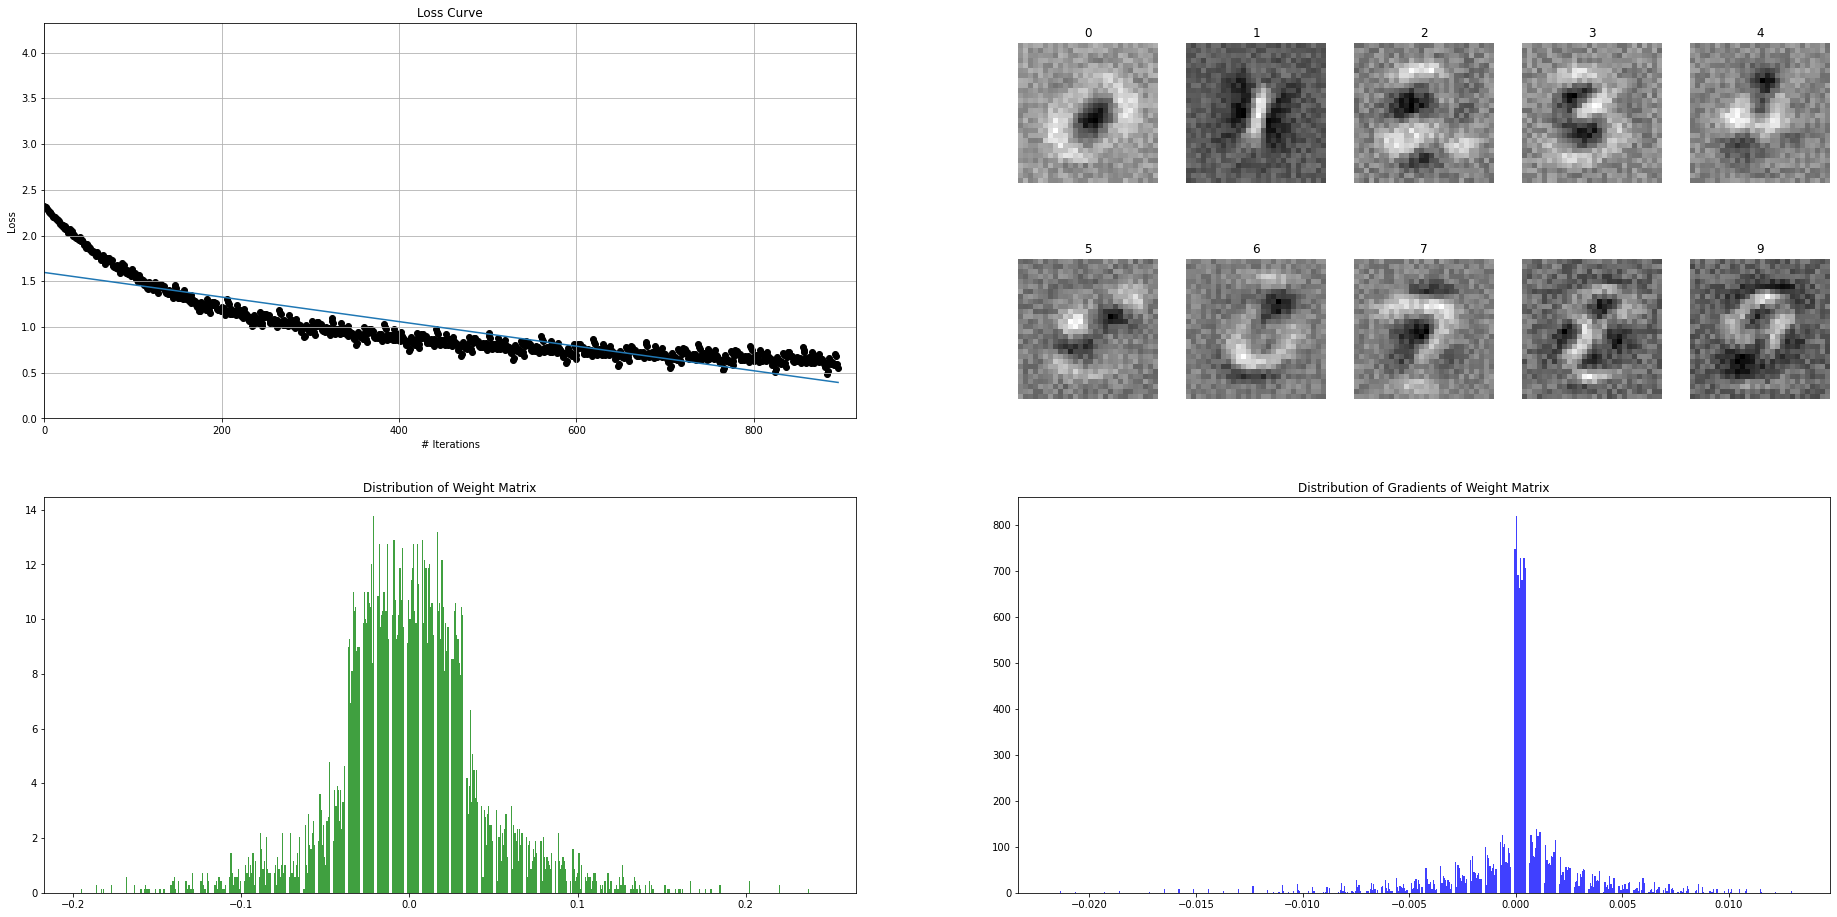

In [ ]:
from torch.utils.data.dataloader import DataLoader
train_data = DataLoader(train_dataset, batch_size = 1024)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
loss_fn = torch.nn.CrossEntropyLoss()
nepochs = 50
loss_buffer = []
steps_buffer = []
for epoch in range(nepochs):
  for ii, batch_data in enumerate(train_data):
    # prepare data
    data, labels = batch_data
    data = data.reshape([-1, 784]).cuda()
    labels = labels.cuda()
    
    # run model
    logits = model(data)
    
    # calculate loss 
    loss = loss_fn(logits, labels)

    # run optimizer
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # plot loss and visualize weights
    loss_buffer.append(loss.detach().cpu())
    steps_buffer.append(epoch*len(train_data) + ii)
    if ii % 10 == 0:
      live_plots(model.output.weight.detach().cpu(), model.output.weight.grad.detach().cpu(),
                 steps_buffer, loss_buffer, 
                steps_buffer[-1]+20, max(loss_buffer) + 2 )



## TODO

+ Add more layers to Neural Network and visualize weights and gradients of each layer
+ Add different non linear functions and observe their effect on training and weight distributions
+ Observer the change in distributions of weights and gradients, how will this change when network becomes deeper?